In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Read vmtable.csv file

In [18]:
vmtable_data_path = "clean/vmtable.csv"
headers = [
    'vmid', 'subscriptionid', 'deploymentid', 'vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu',
    'vmcategory', 'vmcorecountbucket', 'vmmemorybucket'
]
# Load csv file.
vm_table = pd.read_csv(vmtable_data_path, header=None, index_col=False, names=headers)
# Transform vmcorecount '>24' bucket to 30 and vmmemory '>64' to 70.
vm_table = vm_table.replace({'vmcorecountbucket':'>24'}, 30)
vm_table = vm_table.replace({'vmmemorybucket':'>64'}, 70)

vm_table['vmcreated'] = pd.to_numeric(vm_table['vmcreated'], errors="coerce", downcast="integer") // 300
vm_table['vmdeleted'] = pd.to_numeric(vm_table['vmdeleted'], errors="coerce", downcast="integer") // 300
vm_table['vmcorecountbucket'] = pd.to_numeric(
    vm_table['vmcorecountbucket'], errors="coerce", downcast="integer"
)
vm_table['vmmemorybucket'] = pd.to_numeric(vm_table['vmmemorybucket'], errors="coerce", downcast="integer")

vm_table['lifetime'] = vm_table['vmdeleted'] - vm_table['vmcreated']
vm_table.dropna(inplace=True)
vm_table = vm_table.sort_values(by='vmcreated', ascending=True)

vm_table.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime
347144,kpSwcrX+CHcK/lP2teZMUa0F4ctNO90rpn/4aFhNPfT5RL...,luOmMoUemxokLksF7gRd5zJRiU+VmuS6uInTDbUdfAYTOI...,lCtCiIJKascLfG7zQUpGtXiE0oUu3BKbU1VojkYHjikIkz...,0,2194,98.423418,7.859144,17.066535,Delay-insensitive,2,2,2194
2510470,TrT9WlRyBrTHTMn9zSxbYqnG/gHsK9cSiGDJdde5r0t0XI...,kZFIrMO1IbiFxz66Pi+cNFnpjXXcZUdjsi3oBMqTLCm7ET...,uQgp+uLTITSQEknimKTYxA15fMONEJ7vZgcOSMpwJaspR9...,0,8638,96.759640,4.414385,23.714201,Delay-insensitive,2,4,8638
830785,pLTrb59aXYBlVWQS2tf+r26rDKz6W0UcseXu6E/kLm2Ylb...,s5p7dcutAOwIcQS0po5ILB4e7r6aWnplVI3jzFclrCZkeb...,HP/8fCluoPKk9QNc2YrqW7Q5R10UezO8MN9jjF5FCGQNa1...,0,8638,97.704449,3.884552,10.557914,Delay-insensitive,2,2,8638
1157491,/7pHFqwN1JxthKl6mKcXShWXq4wjW9OHVEhWf64wcS1DqQ...,T7xGWLQpR/2cndWS5hdc9TXCu6/TIP2Z/AdzUv4K8/8MLJ...,kVybALUUTZ0g9ULLCAoLAd+I4GO1bZk8F/3uAk5qNVNvMr...,0,8638,57.781047,2.588402,5.072393,Delay-insensitive,2,8,8638
159416,oh4ULuRAdMh+80CE+GYVw+cWQTx06h/MBwfzUmNkQcI10V...,Xo1I1eKsFS3wNzlGmXMB2eGoGnZmI3+xjGxcz8S5+RRfZC...,mNAttgLvtLOQ5/+e03vhT2AAxG9A0/nE2HZYyvgfw7k8HZ...,0,8638,99.231293,13.556653,76.348067,Delay-insensitive,2,2,8638


# Statistics of VM table

In [19]:
print(f"Total numbers of VM: {vm_table['vmid'].unique().shape[0]}")
print(f"The maximum creation time is: {vm_table['vmcreated'].max()}")
print(f"The maximum deletion time is: {vm_table['vmdeleted'].max()}")
print(f"The maximum vm lifetime is: {vm_table['lifetime'].max()}")
print("The VM cores bucket: ", vm_table['vmcorecountbucket'].unique().tolist())
print("The VM memory bucket (GBs): ", vm_table['vmmemorybucket'].unique().tolist())

Total numbers of VM: 2695548
The maximum creation time is: 8638
The maximum deletion time is: 8638
The maximum vm lifetime is: 8638
The VM cores bucket:  [2, 4, 8, 24, 30]
The VM memory bucket (GBs):  [2, 4, 8, 32, 64, 70]


## Figure

### VM creation time distribution

The maximum number of the VM: 227316 at time: 0


<AxesSubplot:xlabel='vmcreated'>

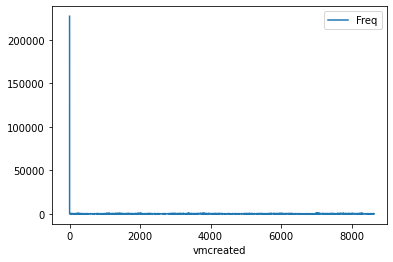

In [20]:
counts_creation = pd.DataFrame(vm_table.groupby('vmcreated').size().rename('Freq')).reset_index()
max_count = counts_creation['Freq'].max()
max_count_index = counts_creation['Freq'].idxmax()
print(f"The maximum number of the VM: {max_count} at time: {max_count_index}")
counts_creation.plot(x='vmcreated', y='Freq', xlim=(-500,9000))

#### Exclude the tick 1

The maximum number of the VM: 1197 at time: 2022


<AxesSubplot:xlabel='vmcreated'>

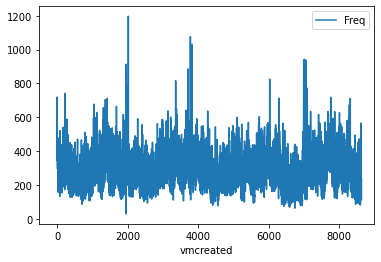

In [21]:
counts_creation_exclude = counts_creation[1:]
max_count = counts_creation_exclude['Freq'].max()
max_count_index = counts_creation_exclude['Freq'].idxmax()
print(f"The maximum number of the VM: {max_count} at time: {max_count_index}")
counts_creation_exclude.plot(x='vmcreated', y='Freq', xlim=(-500,9000))

Count overlapping vms in every tick.

In [22]:
def count_max_overlap(input_list):
    overlap_count = [0] * 8640
    count = 0
    res = 0
    timestamp = 0
    for i in range(len(input_list)):
        overlap_count[input_list[i][0]] += 1
        overlap_count[input_list[i][1] + 1] -= 1

    for i in range(1, len(overlap_count)):
        overlap_count[i] += overlap_count[i-1]
        if overlap_count[i] > res:
            res = overlap_count[i]
            timestamp = i

    print(f"The maximum number of overlapping interval is: {res}")
    print(f"It occurs at time = {timestamp}")
    return overlap_count[:-1]

### Count live VMs

We could see the number of live VMs in every tick are between 222k and 232k. 

The maximum number of overlapping interval is: 232534
It occurs at time = 5471


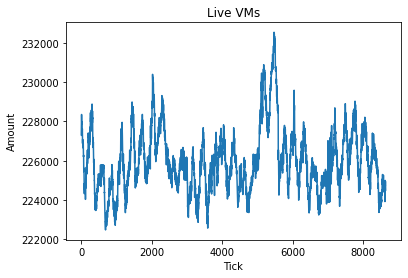

In [23]:
# Count live vms in every tick
vm_lifetime_list = vm_table[['vmcreated', 'vmdeleted']].values.tolist()
vm_lifetime_overlap = count_max_overlap(vm_lifetime_list)
plt.plot(vm_lifetime_overlap)
plt.title('Live VMs')
plt.xlabel('Tick')
plt.ylabel('Amount')
plt.show()

Count CPU cores and memory

In [24]:
def count_overlap(input_list):
    overlap_count = [0] * 8640
    count = 0
    res = 0
    timestamp = 0
    for i in range(len(input_list)):
        overlap_count[input_list[i][0]] += int(input_list[i][2])
        overlap_count[input_list[i][1] + 1] -= int(input_list[i][2])

    for i in range(1, len(overlap_count)):
        overlap_count[i] += overlap_count[i-1]
        if overlap_count[i] > res:
            res = overlap_count[i]
            timestamp = i

    print(f"The maximum number of overlapping interval is: {res}")
    print(f"It occurs at time = {timestamp}")
    return overlap_count[:-1]

## Count total cores every tick

As we know, the VM cores bucket is `[2, 4, 8, 24, 30]`.

We could see the figure below that the
- Total VM cores every tick are between 680k and 640k. 
- The average cores per VM every tick are about 2.9.

The maximum number of overlapping interval is: 687508
It occurs at time = 5469


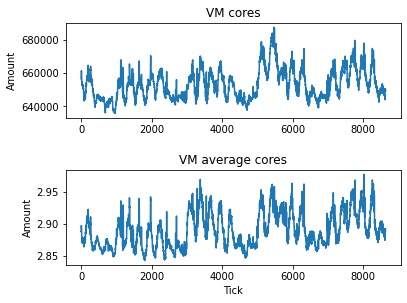

In [25]:
vm_lifetime_cores_list = vm_table[['vmcreated', 'vmdeleted', 'vmcorecountbucket']].values.tolist()
vm_cores_overlap = count_overlap(vm_lifetime_cores_list)
plt.subplot(211)
plt.plot(vm_cores_overlap)
plt.title('VM cores')
# plt.xlabel('Tick')
plt.ylabel('Amount')

vm_core_avg = [vm_cores_overlap[i] / vm_lifetime_overlap[i] for i in range(len(vm_cores_overlap))]
plt.subplot(212)
plt.plot(vm_core_avg)
plt.title('VM average cores')
plt.xlabel('Tick')
plt.ylabel('Amount')

plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.55)
plt.show()

## Count total memory every tick

As we know, the VM memory bucket is `[2, 4, 8, 32, 64, 70]`.

We could see the figure below that the
- Total VM memory every tick are between 1.9M and 2.2M. 
- The average memory per VM every tick are about 9(GBs).

The maximum number of overlapping interval is: 2206638
It occurs at time = 5469


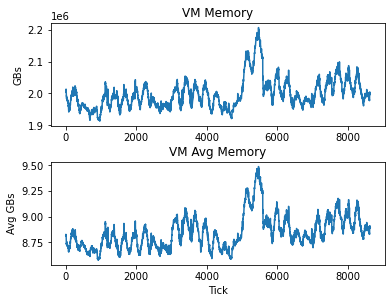

In [26]:
vm_lifetime_memory_list = vm_table[['vmcreated', 'vmdeleted', 'vmmemorybucket']].values.tolist()
vm_memory_overlap = count_overlap(vm_lifetime_memory_list)
plt.subplot(211)
plt.plot(vm_memory_overlap)
plt.title('VM Memory')
plt.ylabel('GBs')

plt.subplot(212)
vm_memory_avg = [vm_memory_overlap[i] / vm_lifetime_overlap[i] for i in range(len(vm_memory_overlap))]
plt.plot(vm_memory_avg)
plt.title('VM Avg Memory')
plt.xlabel('Tick')
plt.ylabel('Avg GBs')

plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.35)
plt.show()

## Count total cores usage every tick

Count the cpu cores utilization every tick.

In [27]:
def convert_cpu_utilization(input_list):
    vm_cpu_util_list = []
    for i in range(len(input_list)):
        util_cores = round(input_list[i][2] * input_list[i][3] / 100, 3)
        templ = [int(input_list[i][0]), int(input_list[i][1]), util_cores]
        vm_cpu_util_list.append(templ)
    return vm_cpu_util_list

Plot `maxcpu` adn `avgcpu` both.

The maximum number of overlapping interval is: 406515
It occurs at time = 7767
The maximum number of overlapping interval is: 22374
It occurs at time = 7767


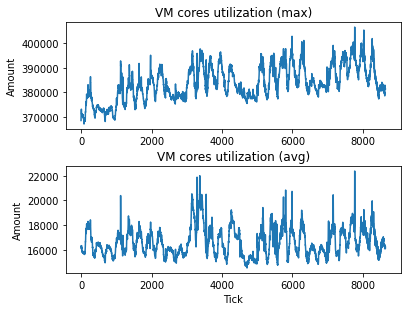

In [28]:
vm_maxcpu_list = vm_table[['vmcreated', 'vmdeleted', 'maxcpu', 'vmcorecountbucket']].values.tolist()
vm_avgcpu_list = vm_table[['vmcreated', 'vmdeleted', 'avgcpu', 'vmcorecountbucket']].values.tolist()

vm_max_cpu_util_list = convert_cpu_utilization(vm_maxcpu_list)
vm_avg_cpu_util_list = convert_cpu_utilization(vm_avgcpu_list)

maxcpu_usage_overlapping = count_overlap(vm_max_cpu_util_list)
plt.subplot(211)
plt.plot(maxcpu_usage_overlapping)
plt.title('VM cores utilization (max)')
plt.ylabel('Amount')

avgcpu_usage_overlapping = count_overlap(vm_avg_cpu_util_list)
plt.subplot(212)
plt.plot(avgcpu_usage_overlapping)
plt.title('VM cores utilization (avg)')
plt.xlabel('Tick')
plt.ylabel('Amount')

plt.subplots_adjust(top=0.95, bottom=0.08, hspace=0.35)
plt.show()

## Select 336k Sample

Reference: [Resource Central](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/10/Resource-Central-SOSP17.pdf).

Refer to the paper, they picked up 336k of the original vmtable, so we also randomly selected 336k VMs to do some analytics.

In [29]:
vm_table_336k = vm_table.sample(n=336000, random_state=9)
vm_table_336k

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket,lifetime
1588594,ssDj08VdRzi6j+lYYjIk3Bpd8ml+Yl5i/76Pm5uOiIUxSn...,ipxXXsn0bCXkjmJOZtlV6bilgztEtGEBUXTFv0z3wY6BF8...,zRkZ3zlbYh4wIWdlCcGVukwKRgQ5GClzlwQXgwO7J6ThmX...,965,966,5.205011,1.408319,5.205011,Unknown,2,8,1
2332486,C1GRe4m1oY/Y0XGvH+gBPRPjMiJn4l5FAKzRWo/pVaf4/6...,kQZJuY7i4Oz7q4tE/1kjTA1kZl5Gs9MqoNA8mZz3Gjsylo...,l5I9aOXJ2klD6KsGMD35P1pyFse9BeH/Ui2pihuD+RMS78...,2230,2276,74.269074,9.658883,70.181324,Unknown,2,4,46
1724047,dcSi6G15cmYEXxayGWa21ovJ5nKq/ZUjFeqcaagOBVazrs...,fvt5CjQjKgIdZcb2OSMDL2B9QF8gOXlrQU6rwYOSUVvQ3p...,zCQU/NJ7+2IhD7NF5tbWIc8W4NkZdq4tgpDbik8Ic6sTsb...,5571,5574,48.473345,11.927066,48.473345,Unknown,4,32,3
2328919,/tpGFRj1ZDxSUiJRR13U4AgF5xhKMwr9EdDwer1LLu3WPF...,p14cXGYqCKCcF7b7OdV6bdr/0gCim+u1LeqKoyEkyNNMWf...,ZFCk80sIQzr43FUSqy2DOrcvBhuQkyfVz7gus8SORhyBxC...,4974,4977,1.508506,0.266021,1.508506,Unknown,2,4,3
2657322,SRbGbVWQIw+pESYUfoyW4GFXdycGbo7PgQwvGQAK1Io5I3...,35CE8/lIjnhpNqaMpl4FHTRdPDIr1eDSTrs/Vlliz4WWND...,NigZ/c8yJagCbn7EICLUtBHrlDT7XjCM/Ik6Dhxzp11Y7j...,2308,3762,59.274527,5.876656,22.626457,Unknown,2,2,1454
...,...,...,...,...,...,...,...,...,...,...,...,...
1928405,oyozP9Fkkw6yeoR9HYe/toh7WvaqlRsusQgtRKCLLmtb5p...,aOpTvpXPP1dPxhyRoCsWNXpNjTq7/GDDUWyqXb7Naiin03...,wBC4dbrPdT++nNxj/2PBrGRRrJj5Sw/BwCQiz8lZ7SYu6u...,7760,7842,87.234061,36.617815,56.986982,Unknown,2,2,82
221689,wGxLlAbNiWbL8dZoJJAMKeeku22dryVG9RXtnX/iXpQ76Y...,c7MIPPcAidFKDAzdDbn4eysuM5zUVGgJmD7BENcqGd8YIU...,+EEQhQWBts2mVt3Nyw//LT94sLxB37ZRrZzvNDmRBjIgKp...,1913,3421,76.600853,2.258339,12.255938,Unknown,2,8,1508
819745,Y/rnbwkNfHkAnlq4lrNJcloig/+1htPQw/c3mOPMJCDOAO...,wA+NjFBhsKDx+8aBOS/6S1q0poOnhIjD8c8SswoR9isthg...,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/IBoD...,8106,8110,95.650810,32.830352,95.650810,Unknown,2,8,4
1879203,yUzo6DTdVF86lFBnwiRVpApXmgk/xmge0zMq424Hs89VsC...,Gla8KmitHNF4bY2nD8oJLosS8TE5UxWA2aLhCFYQqSePTc...,ibb2nYoKKnR/ZiXPU8gXzYLieZFTVEMnvSlvuxRZeDjWOw...,0,8638,58.533494,0.989092,6.322984,Delay-insensitive,2,2,8638


## Count overlapping live VMs of 336k subset 

The maximum number of overlapping interval is: 29070
It occurs at time = 5471


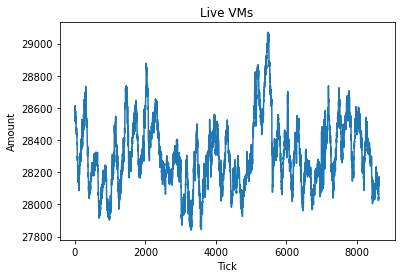

In [30]:
# Count live vms (336k) in every tick
vm336k_lifetime_list = vm_table_336k[['vmcreated', 'vmdeleted']].values.tolist()
vm336k_lifetime_overlap = count_max_overlap(vm336k_lifetime_list)
plt.plot(vm336k_lifetime_overlap)
plt.title('Live VMs')
plt.xlabel('Tick')
plt.ylabel('Amount')
plt.show()

The maximum number of overlapping interval is: 85526
It occurs at time = 5484


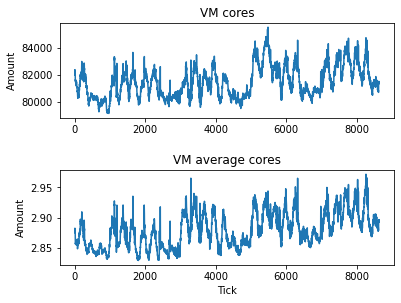

In [31]:
vm336k_lifetime_cores_list = vm_table_336k[['vmcreated', 'vmdeleted', 'vmcorecountbucket']].values.tolist()
vm336k_cores_overlap = count_overlap(vm336k_lifetime_cores_list)
plt.subplot(211)
plt.plot(vm336k_cores_overlap)
plt.title('VM cores')
# plt.xlabel('Tick')
plt.ylabel('Amount')

vm336k_core_avg = [vm336k_cores_overlap[i] / vm336k_lifetime_overlap[i] for i in range(len(vm336k_cores_overlap))]
plt.subplot(212)
plt.plot(vm336k_core_avg)
plt.title('VM average cores')
plt.xlabel('Tick')
plt.ylabel('Amount')

plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.55)
plt.show()

### Count memory of 336k VMs

The maximum number of overlapping interval is: 273612
It occurs at time = 5471


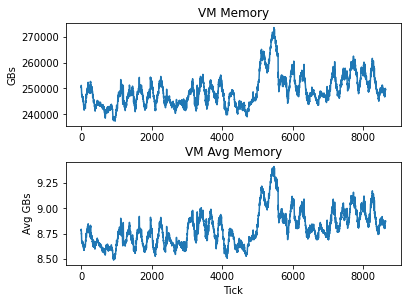

In [32]:
vm336k_lifetime_memory_list = vm_table_336k[['vmcreated', 'vmdeleted', 'vmmemorybucket']].values.tolist()
vm336k_memory_overlap = count_overlap(vm336k_lifetime_memory_list)
plt.subplot(211)
plt.plot(vm336k_memory_overlap)
plt.title('VM Memory')
plt.ylabel('GBs')

plt.subplot(212)
vm336k_memory_avg = [vm336k_memory_overlap[i] / vm336k_lifetime_overlap[i] for i in range(len(vm336k_memory_overlap))]
plt.plot(vm336k_memory_avg)
plt.title('VM Avg Memory')
plt.xlabel('Tick')
plt.ylabel('Avg GBs')

plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.35)
plt.show()